Задание 6. Описательная статистика

Инструкция:

Шаг 1.  Изучите материалы лекционных и практических занятий по темам раздела 4.  

Шаг 2. Выполните описательный анализ признаков предложенного датасета (Алгоритм выполнения представлен в практическом занятии по теме 4.1):

2.1 Загрузите датасет;

2.2 Разделите признаки на две группы: категориальные и непрерывные;

2.3 Для каждого из категориальных признаков: 
- рассчитайте моду; 
- постройте столбчатую диаграмму, отражающую число объектов по каждому значению признака (выбор библиотеки визуализации и соответствующих методов остается за исполнителем);
- на диаграмме каждый столбец должен сопровождаться надписью о количестве элементов с данным значением;   

2.4 Для каждого из непрерывных признаков:
- рассчитайте выборочное среднее, медиану, моду, квартили (0.01, 0.05 и 0.95, 0.99), значения нижнего и верхнего усов; 
- постройте вертикальные линии, соответствующие рассчитанным статистикам. Рисунок оснастите легендой; 
- постройте плотность распределения и гистограмму;
- объедините на одном графике плотность распределения и вертикальные линии статистик.

Шаг 3. Опубликуйте файл расширения ipynb на платформе Odin

**Описание данных**

Каждый клиент характеризуется следующим набором данных:

|Признак|Описание признака|
|---:|:---|
|`userid`|идентификатор пользователя|
|`score`|баллы кредитного скоринга|
|`Gender`|пол|
|`Age`|возраст|
|`Objects`|количество объектов в собственности|
|`Balance`|баланс на счете|
|`Products`|количество продуктов, которыми пользуется клиент|
|`estimated_salary`|заработная плата клиента|

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

from functools import reduce

%matplotlib inline
import matplotlib.pyplot as plt

font_size = 16

In [2]:
#подключение библиотеки к проекту
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('tableau-colorblind10')

In [3]:
# загрузка исходных данных
df = pd.read_csv('/content/bank_dataset.csv')                     
df

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# просмотр значений для поиска 
df.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()
# Nan в 'balance' общее число 380 записей

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
#Предобработка данных
#переименование признаков 
df.columns = df.columns.str.lower()
df.rename(columns = {'floor' : 'level',
           'citycenters_nearest' : 'city_centers_nearest',
           'parks_around3000' : 'parks_around_3000',
           'ponds_around3000' : 'ponds_around_3000'},
          inplace = True)
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

In [7]:
dict_to_rus = {
'user_id':'идентификатор пользователя',
'score':'баллы кредитного скоринга',
'city': 'город',
'gender': 'пол',
'age': 'возраст',
'objects': 'объекты собственности',
'balance': 'баланс на счете',
'products': 'количество продуктов',
'credit_card': 'наличие кредитной карты',
'loyalty': 'активный клиент',
'estimated_salary': 'заработная плата',
'churn':'уход'
} 

Разделите признаки на две группы: категориальные и непрерывные;

In [8]:
#разделение признаков на непрерывные и категориальные (дискретные)
# df.columns
v_category = ['gender', 'objects',  'products']
v_continuous = ['score', 'age', 'balance', 'estimated_salary']

In [9]:
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

In [10]:
# просмотр уникальных значений категориальных признаков 
for col in df.select_dtypes('object'):
    print(df[col].unique())

['Ярославль' 'Рыбинск' 'Ростов Великий']
['Ж' 'М']


In [11]:
# статистика по выдаче кредитов в интернете  банки дают кредит до 80 лет
df = df.query('age <= 80')
# удаляем 10 клиентов с доходом <= 6000 
df = df.query('estimated_salary >= 6000')

In [12]:
#работа с дублями
df.duplicated().sum()
#удаление дублей
df.drop_duplicates()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


In [13]:
# в зависимости от задачи (меняем на 0 ИЛИ удаляем Nan)
# df['balance'] = df['balance'].fillna(0)
df.dropna(subset = ['balance'], inplace = True)
df.isnull().sum()

userid              0
score               0
city                0
gender              0
age                 0
objects             0
balance             0
products            0
creditcard          0
loyalty             0
estimated_salary    0
churn               0
dtype: int64

In [14]:
#рассчитайте моду
df[v_category].mode().values[0]

array(['М', 1, 1], dtype=object)

In [15]:
# Рассчитайте моду
df[v_category].mode()

,gender,objects,products
0,М,1,1


<ipython-input-16-34626f8c474c>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, v)


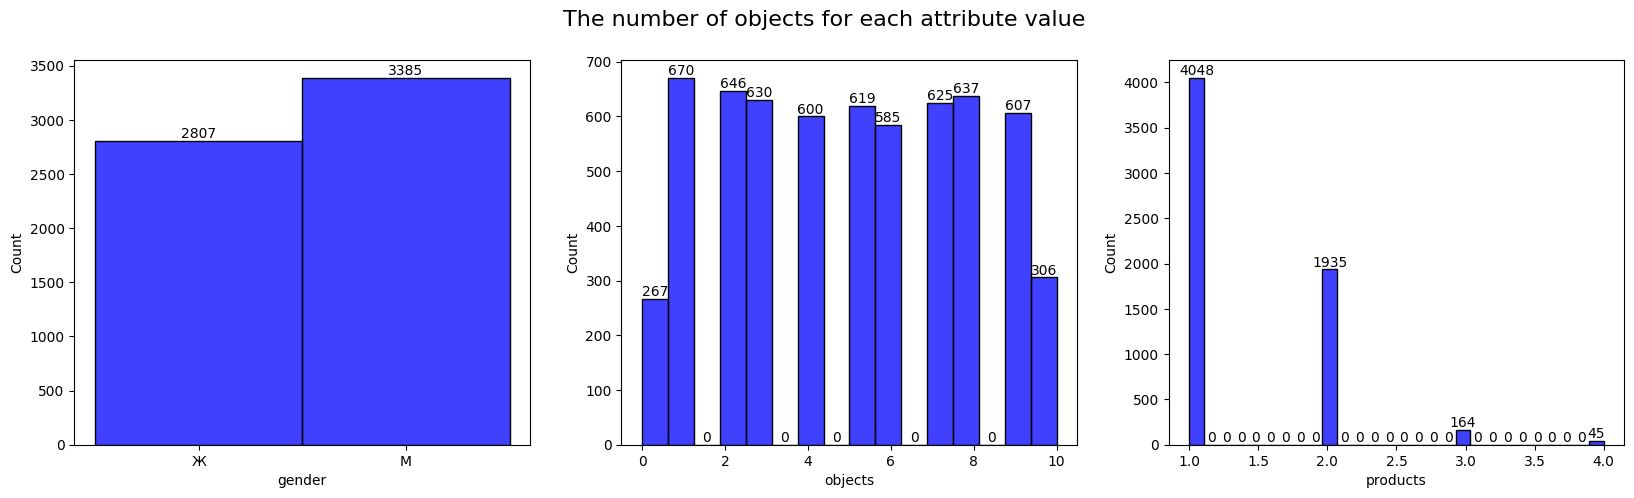

In [16]:
# Постройте столбчатую диаграмму, отражающую число объектов по каждому значению признака (выбор библиотеки визуализации и соответствующих методов остается за исполнителем)
fig, ax = plt.subplots( 1, figsize = (20, 5) )
fig.suptitle('The number of objects for each attribute value\n', fontsize=16 )

for v, k in enumerate(v_category, start=1):
    plt.subplot(1, 3, v)
    ax = sns.histplot(data=df[k], color = "blue")
    for c in ax.containers:
        ax.bar_label(c)

Для каждого из непрерывных признаков

In [17]:
bins = range(0, 230000, 10000)
labels = list()

for i in bins:
    labels.append(f'от {i} до {i + 10000}')
del labels[-1]

#  MODE 
df['balance_bucket'] = pd.cut(
    df.balance,bins=bins,labels= labels,include_lowest=True
)
df['estimated_salary_bucket'] = pd.cut(
    df.estimated_salary,bins=bins,labels= labels,include_lowest=True
)
df[['score', 'age', 'balance_bucket', 'estimated_salary_bucket']].mode().head(1)


,score,age,balance_bucket,estimated_salary_bucket
0,850,37,от 120000 до 130000,от 100000 до 110000


In [18]:
# еще способ как посчитать MODE (приведем в общий вид, округлим)
df['balance_round'] = df.balance.div(1000).round().mul(1000)
df['estimated_salary_round'] = df.estimated_salary.div(1000).round().mul(1000)

df_mode = (df[['score', 'age', 'balance_round', 'estimated_salary_round']]
            .mode(numeric_only=True).head(1)
            .rename(index={0:'mode'}, columns={
                'balance_round':'balance',
                'estimated_salary_round': 'estimated_salary'})
          )
df_mode

,score,age,balance,estimated_salary
mode,850,37,124000.0,178000.0


In [19]:
df_median = (pd.DataFrame( df[v_continuous].median() )
             .transpose()
             .rename(index={0:'median'})
             ); df_median

,score,age,balance,estimated_salary
median,652.0,38.0,119962.465,103562.105


In [20]:
df_mean = (pd.DataFrame( df[v_continuous].mean() )
           .transpose()
           .rename(index={0:'mean'})
           ); df_mean

,score,age,balance,estimated_salary
mean,651.138889,39.162306,119888.001437,103612.382988


In [21]:
df_quantile = (df[v_continuous]
               .quantile([0.01, 0.05, 0.95, 0.99])
               .rename(index={
                            0.01:'qq_01', 0.05:'qq_05',
                            0.95:'qq_95', 0.99:'qq_99'})
               ); df_quantile

,score,age,balance,estimated_salary
qq_01,433.91,21.0,47520.9245,8651.4394
qq_05,489.00,25.0,70297.3230,16690.8525
qq_95,813.00,60.0,169922.9405,190885.5880
qq_99,850.00,71.0,190487.3253,198183.7218


In [22]:
columns = df[v_continuous].columns
moustache = pd.DataFrame(columns=columns)

for column in columns:
    Q1, median, Q3 = np.percentile(np.asarray(df[column].dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df[column]) <= hival, np.asarray(df[column]))
    wisklo = np.compress(np.asarray(df[column]) >= loval, np.asarray(df[column]))
    moustache[column] = np.max(wiskhi), np.min(wisklo)
moustache = moustache.rename(index={0:'up_moustache',1:'down_moustache'})
moustache

,score,age,balance,estimated_salary
up_moustache,850,62,198546.10,199970.74
down_moustache,383,18,41299.03,6009.27


In [23]:
# all objects
# reduce - используется в серии, чтобы применить функцию, переданную в ее аргументе, ко всем элементам в серии
df_s = [df_mode, df_median, df_mean, df_quantile, moustache]
final_df = (reduce(lambda l, r: pd.concat([l, r]), df_s)).round().astype(int)
final_df

,score,age,balance,estimated_salary
mode,850,37,124000,178000
median,652,38,119962,103562
mean,651,39,119888,103612
qq_01,434,21,47521,8651
qq_05,489,25,70297,16691
qq_95,813,60,169923,190886
qq_99,850,71,190487,198184
up_moustache,850,62,198546,199971
down_moustache,383,18,41299,6009


In [24]:
# auxiliary lists
list_index = list(final_df.index)
list_style = ['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed', 'dashed', 'dotted', 'dotted']
list_color = ['darkred', 'indianred', 'brown', 'purple', 'violet', '#11567e', 'blue', 'orange', 'green']

<ipython-input-25-6d68fd76153a>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, v)


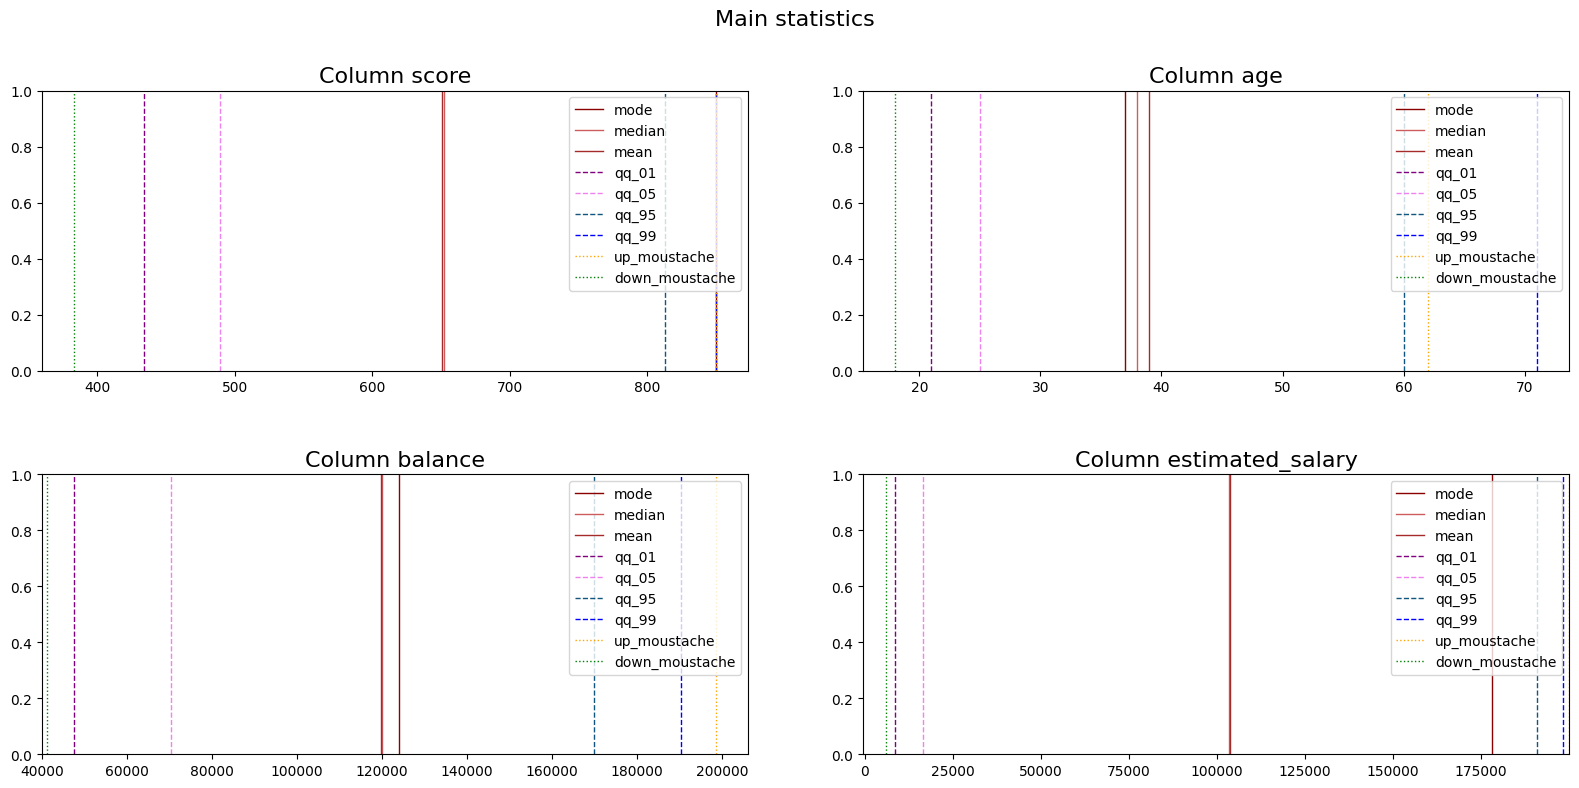

In [25]:
# Постройте вертикальные линии, соответствующие рассчитанным статистикам. Рисунок оснастите легендой
fig, ax = plt.subplots( 2, figsize = (16, 8) )
fig.suptitle('Main statistics\n', fontsize=16 )

for v, k in enumerate(v_continuous, start=1):

    # histogram
    plt.subplot(2, 2, v)
    fig.tight_layout(h_pad=4, w_pad=6 )

    # lines
    for value, key in enumerate(list_index, start=0):
        plt.axvline(x = final_df.loc[list_index[value]][k],
                   color = list_color[value],
                   label = list_index[value], linestyle=list_style[value],
                   linewidth=1
                   )
    # styles
    plt.title(f'Column {k}', fontsize= font_size)

    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')

<ipython-input-26-868dbf637548>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, 2*index + 1)
<ipython-input-26-868dbf637548>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, 2*index + 1)
<ipython-input-26-868dbf637548>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, 2*index + 1)
<ipython-input-26-868dbf637548>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, 2*index + 1)


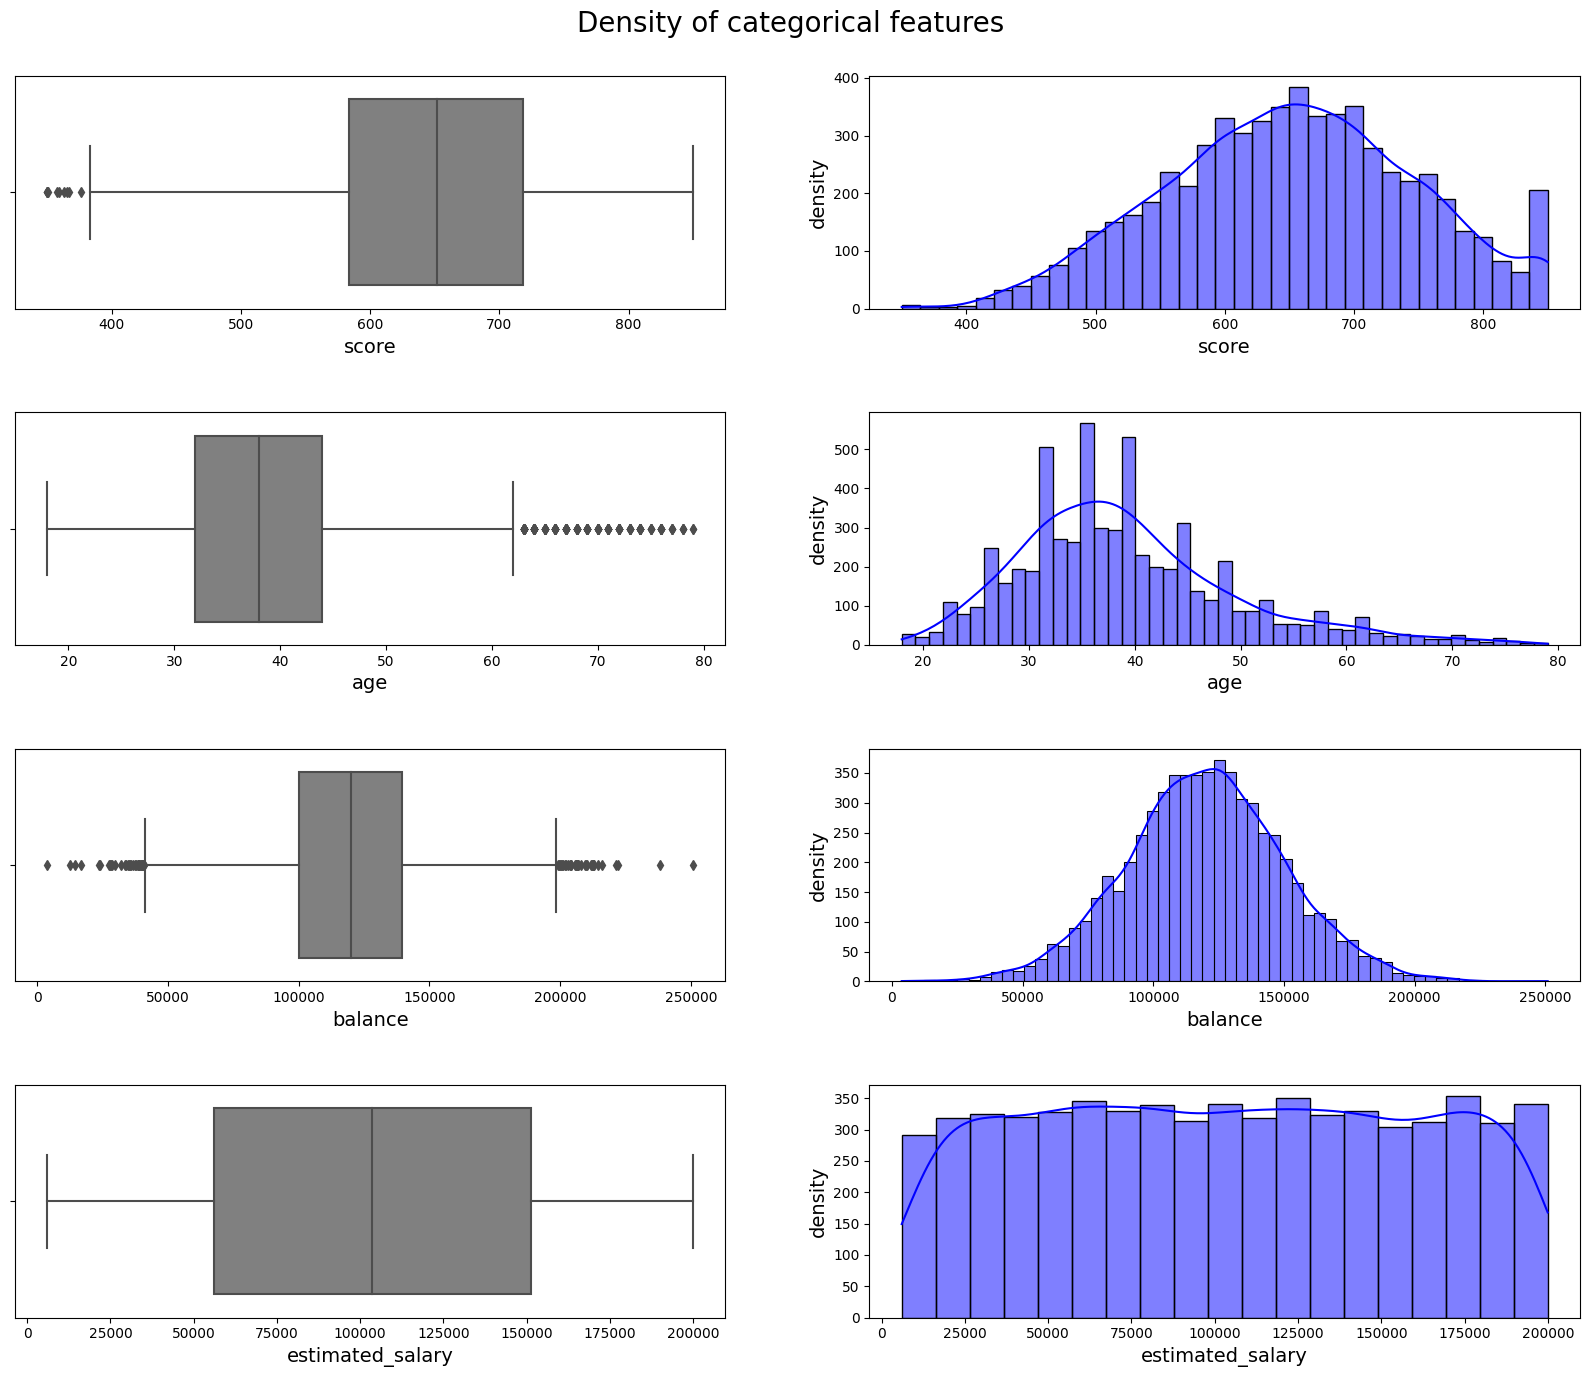

In [26]:
# Постройте плотность распределения и гистограмму
font_size = 14
fig, ax = plt.subplots( 4, figsize = (16, 14) )
fig.suptitle('Density of categorical features \n', fontsize=20 )

for index, column in enumerate(v_continuous):

    # box mustache
    plt.subplot(4, 2, 2*index + 1)
    ax = sns.boxplot(data = df, x = column, color = 'grey')
    ax.set_xlabel(column, fontsize = font_size)
    ax.set_ylabel('', fontsize = font_size)

    # histogram
    plt.subplot(4, 2, 2*index + 2)
    ax = sns.histplot(df[column], kde=True, color = 'blue')
    fig.tight_layout(h_pad=4, w_pad=6 )
    ax.set_xlabel(column, fontsize = font_size)
    ax.set_ylabel('density', fontsize = font_size)

<ipython-input-27-7fa6ba1212b1>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, v)
<ipython-input-27-7fa6ba1212b1>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, v)


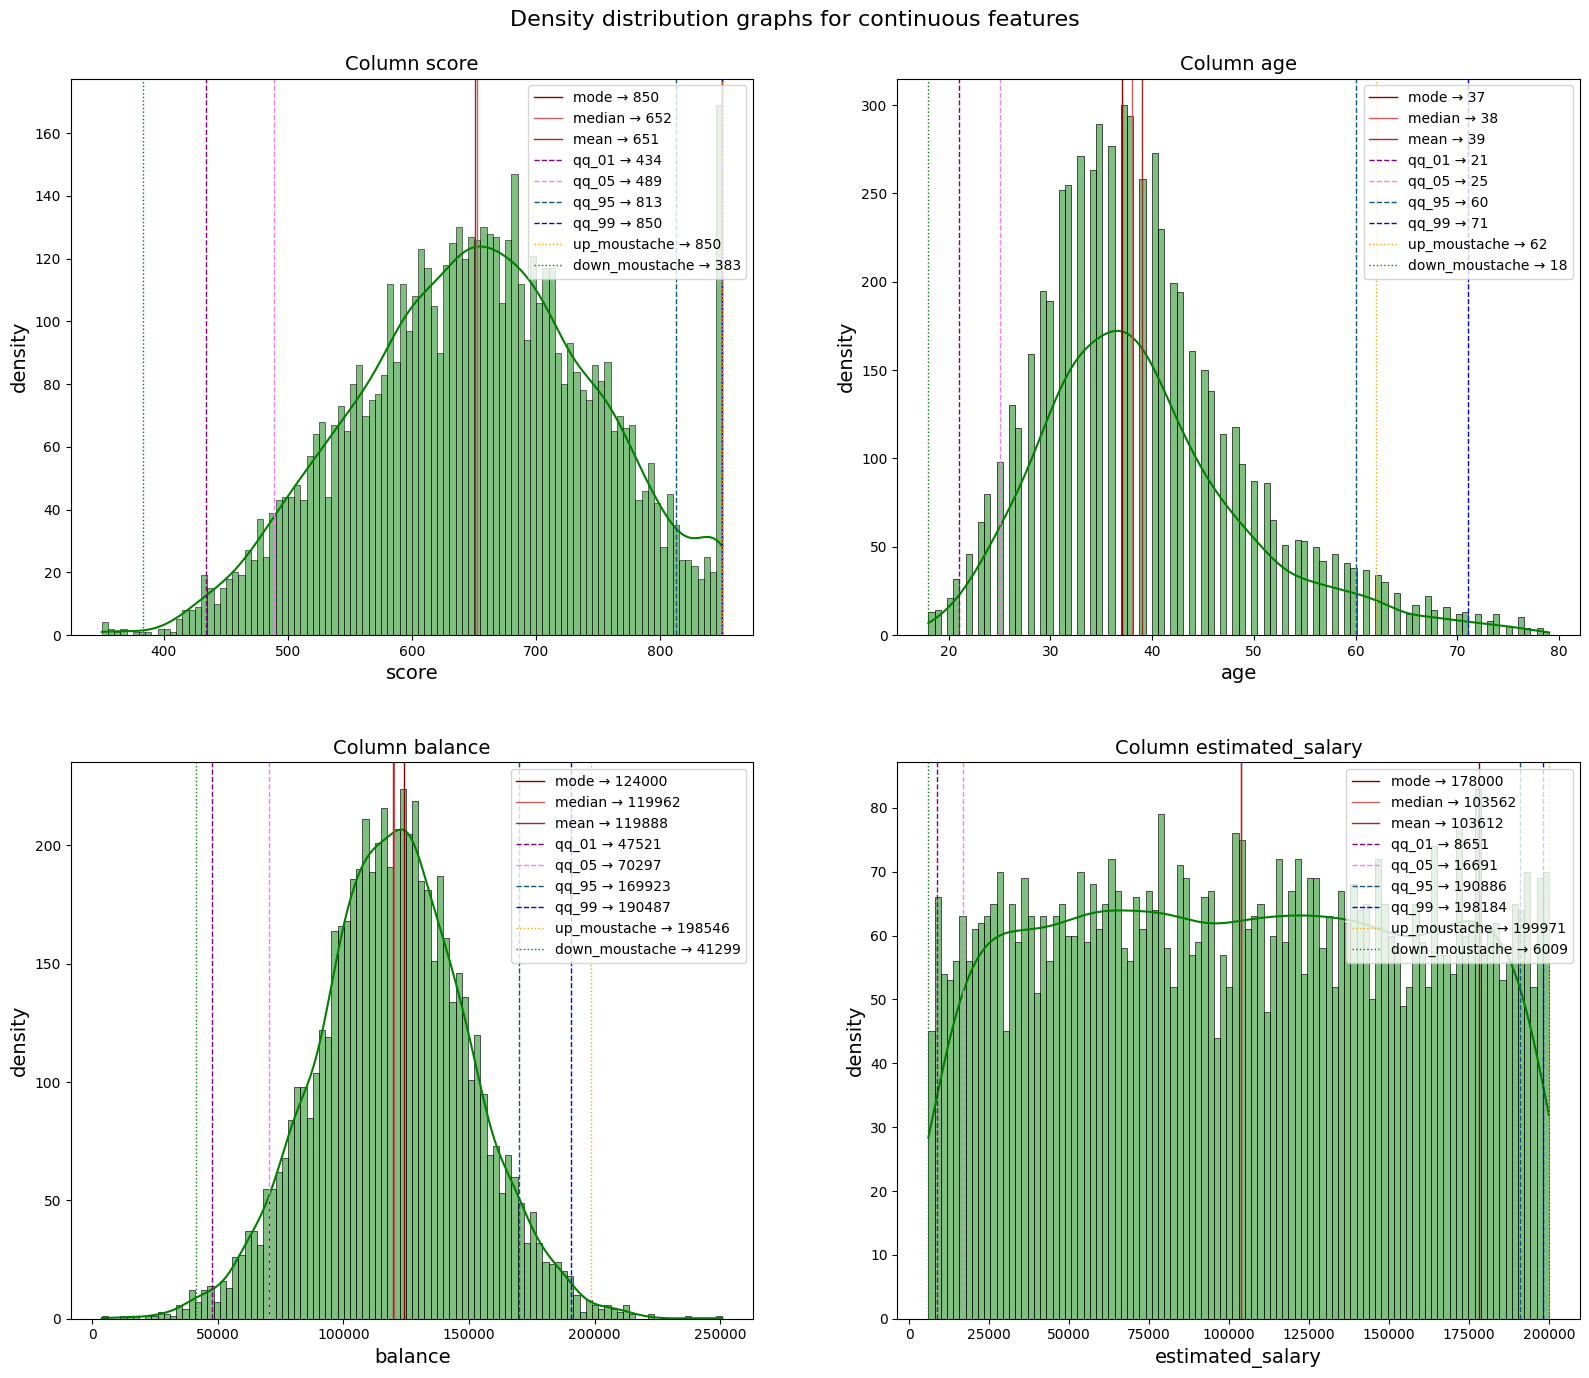

In [27]:
# Объедините на одном графике плотность распределения и вертикальные линии статистик.
fig, ax = plt.subplots( 2, figsize = (16, 14) )
fig.suptitle('Density distribution graphs for continuous features\n', fontsize=16 )

for v, k in enumerate(v_continuous, start=1):

    # histogram
    plt.subplot(2, 2, v)
    ax = sns.histplot(df[k], kde=True, bins=100, color = 'green')
    fig.tight_layout(h_pad=4, w_pad=6 )
    # styles
    ax.set_xlabel(k, fontsize = font_size)
    ax.set_ylabel('density', fontsize = font_size)
    ax.set_title(f'Column {k}', fontsize= font_size)
    # lines
    for value, key in enumerate(list_index, start=0):
        i = final_df.loc[list_index[value]][k]
        plt.axvline(x = i,
                   color = list_color[value],
                   label = f'{list_index[value]} → {i}',
                   linestyle=list_style[value],
                   linewidth=1
                   )
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')